In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

As there is too little data for Kaliningrad and it is very fragmented, we'll merge the data from the two points.  
The dates for these two points don't intersect and they are located quite close to each other. So, it's OK to combine them.

In [2]:
data_dir = './data'
k1 = pd.read_csv(os.path.join(data_dir, 'moskovsky-prospekt,244, kaliningrad-air-quality.csv'))
k2 = pd.read_csv(os.path.join(data_dir, 'oktyabrskaya-str., 3, bolshoe isakovo, kaliningrad-air-quality.csv'))
v = pd.read_csv(os.path.join(data_dir, 'europalaan,-veldhoven-air-quality.csv'))

In [3]:
k = pd.concat([k1, k2])

In [4]:
k.rename(columns={' pm25': 'Kaliningrad-pm2.5-AQI', ' pm10': 'Kaliningrad-pm10-AQI'}, inplace=True)
v.rename(columns={' pm25': 'Veldhoven-pm2.5-AQI', ' pm10': 'Veldhoven-pm10-AQI'}, inplace=True)

In [5]:
def transform_date_to_iso(date):
    # input e.g. 2023/5/1
    return '-'.join([f'{int(x):02}' for x in date.split('/')])

In [6]:
# Putting dfs in order
k['date'] = k['date'].apply(transform_date_to_iso)
v['date'] = v['date'].apply(transform_date_to_iso)

In [7]:
# Merge dfs
df = pd.merge(left=v, right=k, on='date', how='inner')
# Keep only needed columns
columns_of_interest = ['date', 'Kaliningrad-pm2.5-AQI', 'Kaliningrad-pm10-AQI', 'Veldhoven-pm2.5-AQI', 'Veldhoven-pm10-AQI']
df = df.loc[:, columns_of_interest]
df.sort_values(by='date', inplace=True)
for col in columns_of_interest[1:]:
    df[col] = df[col].apply(lambda x: None if x == ' ' else int(x))
# Drop rows with missing data
df.dropna(inplace=True)
df.to_csv(os.path.join(data_dir, 'combined_data.csv'), index=False)
print(len(df))
df.head()

163


,date,Kaliningrad-pm2.5-AQI,Kaliningrad-pm10-AQI,Veldhoven-pm2.5-AQI,Veldhoven-pm10-AQI
113,2020-01-30,72.0,15.0,25.0,7.0
114,2020-01-31,55.0,13.0,18.0,12.0
115,2020-02-01,46.0,5.0,24.0,18.0
116,2020-02-02,19.0,16.0,27.0,20.0
117,2020-02-03,49.0,26.0,32.0,9.0


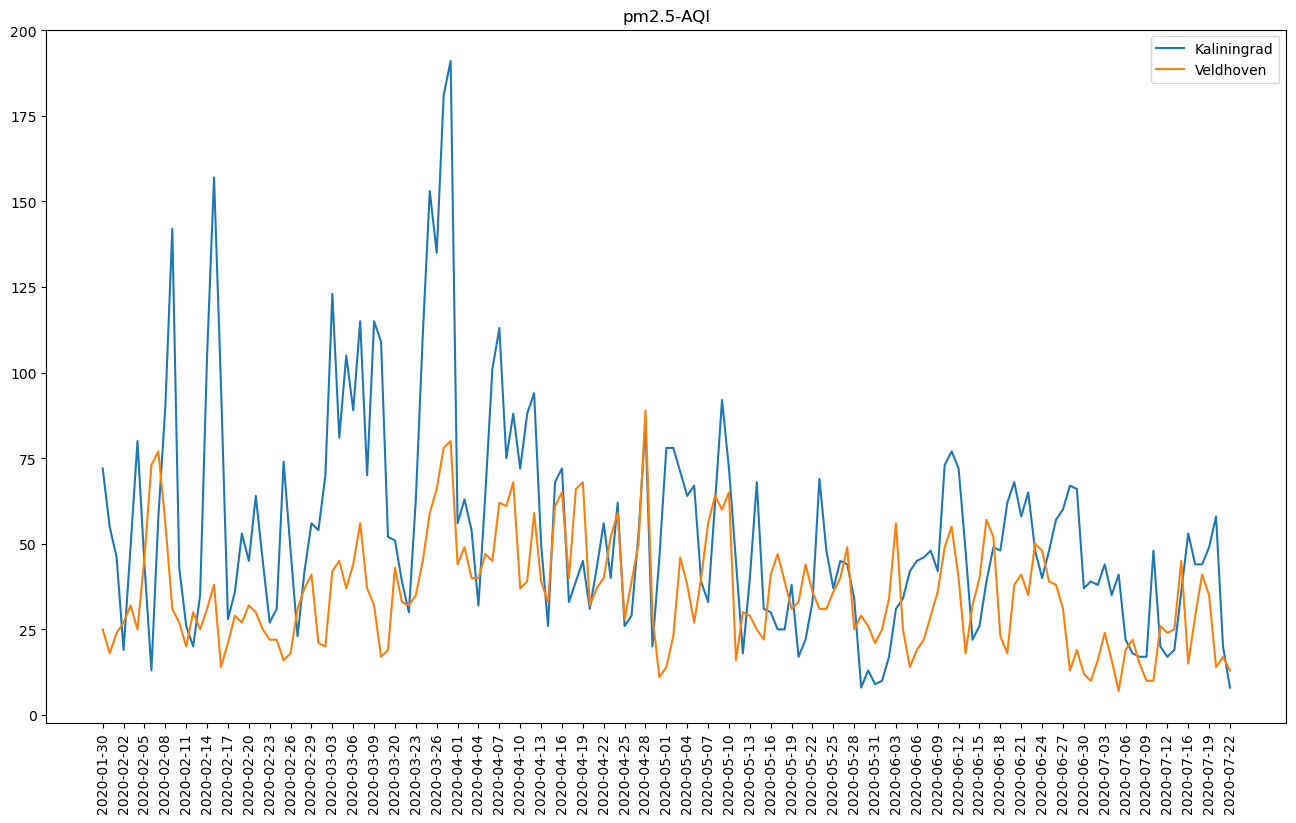

In [8]:
plt.figure(figsize=(16,9))
plt.title('pm2.5-AQI')
ticks = np.arange(len(df))
plt.plot(ticks, df['Kaliningrad-pm2.5-AQI'], label='Kaliningrad')
plt.plot(ticks, df['Veldhoven-pm2.5-AQI'], label='Veldhoven')
plt.xticks(ticks[::3], df['date'].values[::3], rotation=90)
plt.legend()
plt.show()

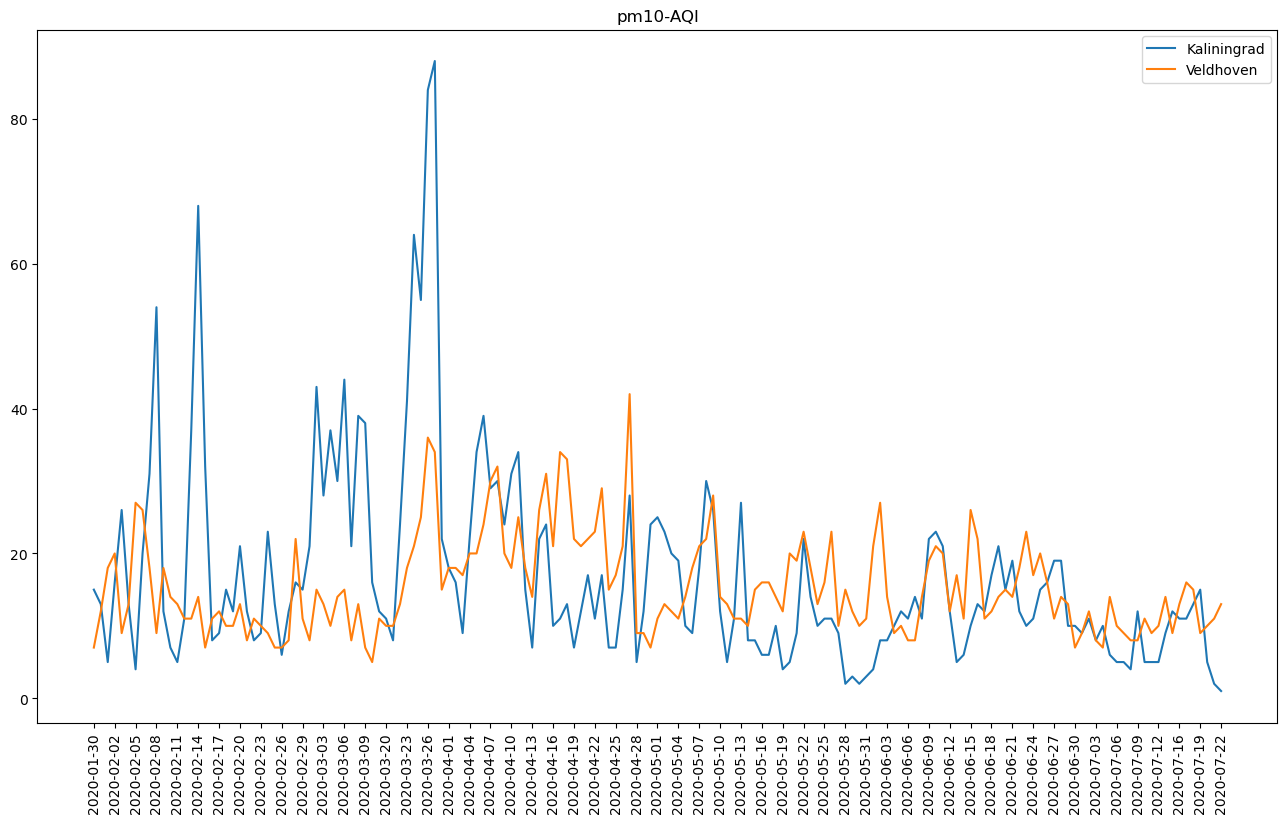

In [9]:
plt.figure(figsize=(16,9))
plt.title('pm10-AQI')
ticks = np.arange(len(df))
plt.plot(ticks, df['Kaliningrad-pm10-AQI'], label='Kaliningrad')
plt.plot(ticks, df['Veldhoven-pm10-AQI'], label='Veldhoven')
plt.xticks(ticks[::3], df['date'].values[::3], rotation=90)
plt.legend()
plt.show()

In [10]:
stats = dict()
stats['places'] = columns_of_interest[1:]
stats['min'] = list()
stats['max'] = list()
stats['mean'] = list()
stats['median'] = list()
for col in columns_of_interest[1:]:
    stats['min'].append(df[col].min())
    stats['max'].append(df[col].max())
    stats['mean'].append(df[col].mean())
    stats['median'].append(df[col].median())
stats = pd.DataFrame(stats)

In [11]:
stats.head()

,places,min,max,mean,median
0,Kaliningrad-pm2.5-AQI,8.0,191.0,54.423313,48.0
1,Kaliningrad-pm10-AQI,1.0,88.0,16.944785,12.0
2,Veldhoven-pm2.5-AQI,7.0,89.0,35.552147,33.0
3,Veldhoven-pm10-AQI,5.0,42.0,15.423313,14.0
